In [15]:
import pandas as pd
from scipy.stats import levene
from scipy.stats import ttest_ind
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
#Load dataframe
df_control = pd.read_csv("control_group.csv")
df_test = pd.read_csv("test_group.csv")

In [3]:
df_control.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Impression  40 non-null     int64
 1   Click       40 non-null     int64
 2   Purchase    40 non-null     int64
 3   Earning     40 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Impression  40 non-null     int64
 1   Click       40 non-null     int64
 2   Purchase    40 non-null     int64
 3   Earning     40 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB


In [5]:
# chack for duplicate
df_control.duplicated().sum(), df_test.duplicated().sum()

(0, 0)

# Define the null and alternative hypothsis¶
In statistical hypothesis testing, the null hypothesis (H0) suppose that there is no significant effect, relationship, or difference in the variables being studied. It serves as a baseline assumption for statistical analysis. On the other hand, the alternative hypothesis (H1 or Ha) suggests the presence of a statistically significant effect, relationship, or difference. Researchers use hypothesis testing to evaluate the evidence against the null hypothesis, aiming to determine whether the observed data provides enough support to reject the null hypothesis in favor of the alternative. The interplay between these hypotheses forms the foundation for drawing conclusions in statistical analyses.
Choose one of these setting based on the problem.

In [6]:
concatenated_control = pd.concat([
    df_control.describe().T,
    df_control.skew().rename('skewness'),
    df_control.kurtosis().rename('kurtosis')
], axis=1)

print(concatenated_control)

concatenated_test = pd.concat([
    df_test.describe().T,
    df_test.skew().rename('skewness'),
    df_test.kurtosis().rename('kurtosis')
], axis=1)

print(concatenated_test)

            count        mean           std      min       25%      50%  \
Impression   40.0  101711.450  20302.122984  45476.0  85726.75  99790.5   
Click        40.0    5100.625   1329.957772   2190.0   4124.25   5001.5   
Purchase     40.0     550.900    134.110517    267.0    470.50    531.5   
Earning      40.0    1908.575    302.868329   1254.0   1685.75   1975.0   

                 75%       max  skewness  kurtosis  
Impression  115212.5  147539.0 -0.001687  0.410967  
Click         5923.5    7959.0  0.179859 -0.436239  
Purchase       638.0     802.0 -0.026949 -0.571140  
Earning       2120.0    2497.0 -0.275640 -0.382968  
            count        mean           std      min        25%       50%  \
Impression   40.0  120512.425  18807.466616  79034.0  112692.25  119291.5   
Click        40.0    3967.550    923.071766   1837.0    3376.50    3931.5   
Purchase     40.0     582.050    161.175164    312.0     444.75     551.0   
Earning      40.0    2514.925    282.707912   1940.

# Set the probability of type I and type II errors¶
In statistical hypothesis testing, the probability of Type I error (α) corresponds to the likelihood of incorrectly rejecting a true null hypothesis. This is associated with the significance level of the test, denoting the threshold for considering results as statistically significant. On the other hand, the probability of Type II error (β) represents the chance of failing to reject a false null hypothesis. Power (1-β) is the complementary probability to Type II error and reflects the test's ability to correctly identify a true effect when it exists. Adjusting the significance level impacts the trade-off between Type I and Type II errors; a lower significance level reduces the likelihood of Type I error but may increase the risk of Type II error. Researchers must carefully consider these probabilities and the desired balance between them when designing and interpreting hypothesis tests.
In this example we set : α=0.05 and β=0.2.

In [7]:

alpha = 0.05
beta = 0.2
Z = (norm.ppf(1-(alpha/2), loc=0, scale=1) + norm.ppf(1-beta, loc=0, scale=1))**2
var = pd.concat([df_control['Earning'],df_test['Earning']]).var()
expected_effect_size = 200

sample_size = (Z*2*var)/(expected_effect_size**2)

print(sample_size.astype('int'))

69


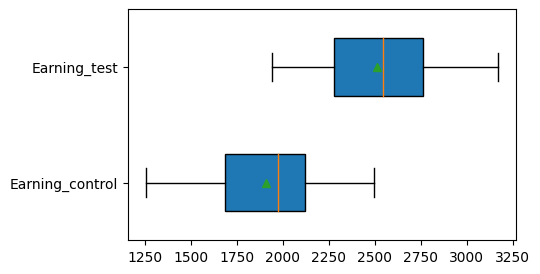

In [12]:


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))

ax.boxplot(
    x=[df_control['Earning'],df_test['Earning']],         # Data to be plotted
    vert=False,                 # Whether to create a vertical boxplot (True) or horizontal (False)
    patch_artist=True,          # If True, fill the box with color
    widths=0.5,                 # Width of the boxes
    sym='r|',                   # Symbol for outliers
    labels=['Earning_control','Earning_test'],     # Labels for each boxplot
    showmeans=True,             # If True, display mean point
    showfliers=True,            # If True, display outliers

)

plt.show()

In [14]:


mean_control = df_control['Earning'].mean()
mean_test = df_test['Earning'].mean()

print("mean_control=", mean_control)
print("mean_test=",mean_test)

# Perform two-sample t-test for each level of 'pathsize_cat'
groupC = df_control['Earning']
groupT = df_test['Earning']

# Perform Levene's test for homogeneity of variances
statistic, p_value_L = levene(groupC, groupT)

if  p_value_L > 0.05:

    t_statistic, p_value = ttest_ind(groupC, groupT,alternative="less" ,equal_var=True)

    print("t-statistic:", t_statistic)
    print("p-value:", p_value)

else:

    t_statistic, p_value = ttest_ind(groupC, groupT,alternative="less", equal_var=False)

    print("t-statistic:", t_statistic)
    print("p-value:", p_value)

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")
print("\n")



mean_control= 1908.575
mean_test= 2514.925
t-statistic: -9.256092651165002
p-value: 1.720180077421263e-14
Reject the null hypothesis: There is a significant difference between the means.




With this we can see that there is a significant difference between the means. Hence, we can conclude that the new version has higher earnings andgo ahead with the new version.